# SQLAlchemy Homework - Surfs Up!

![title](Images/st.jpg)

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall( )

[('2017-08-23',)]

In [12]:
date_init =2017-8-23 

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Create date interval
date_prcplas12m = dt.date(2017,8,23) - dt.timedelta(days = 365)
date_prcplas12m 

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
prcplast12m = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date_prcplas12m)
prcplast12m

In [15]:
# Save the query results as a Pandas DataFrame
prcplast12m_df = pd.DataFrame(prcplast12m)
prcplast12m_df.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


In [16]:
 #set the index to the date column
prcplast12m_df.set_index('date')
prcplast12m_df.head(10)


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


In [17]:
# Sort the dataframe by date
prcplast12m_df = prcplast12m_df.sort_index(ascending = True)
prcplast12m_df



,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


## Plott

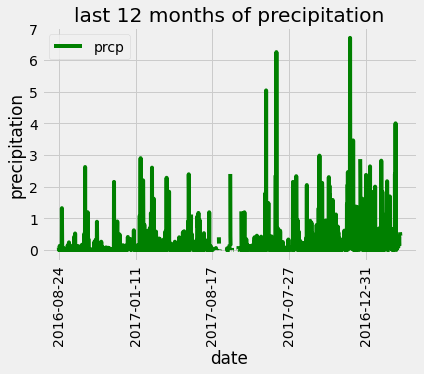

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
prcplast12m_df.plot('date','prcp', color = 'g')
plt.title('last 12 months of precipitation')
plt.xlabel('date')
plt.ylabel('precipitation')
plt.xticks(rotation = 90)
plt.savefig("Resources/Precipitation.png")

## summary statistics

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcplast12m_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
TN_Stations = session.query(Station).count()
TN_Stations

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

BActive_Stations = (session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())

In [22]:
print(str(BActive_Stations))

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [23]:
MostA_station =BActive_Stations [0][0]


## Most active station

In [24]:
print(MostA_station)

USC00519281


## List the stations and the counts in descending order.

In [25]:
# List the stations and the counts in descending order.
for j, i in BActive_Stations:
    print("Station " + j +  " observations."  + str(i))



Station USC00519281 observations.2772
Station USC00519397 observations.2724
Station USC00513117 observations.2709
Station USC00519523 observations.2669
Station USC00516128 observations.2612
Station USC00514830 observations.2202
Station USC00511918 observations.1979
Station USC00517948 observations.1372
Station USC00518838 observations.511


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281')
temp

In [27]:
print(str(temp))

SELECT measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ?


In [28]:
print(temp)

SELECT measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ?


In [29]:
# Save the query results as a Pandas DataFrame
temp_df = pd.DataFrame(temp)
temp_df.head(2773)

,station,date,tobs
0,USC00519281,2010-01-01,70.0
1,USC00519281,2010-01-02,62.0
2,USC00519281,2010-01-03,74.0
3,USC00519281,2010-01-04,75.0
4,USC00519281,2010-01-05,74.0
...,...,...,...
2767,USC00519281,2017-08-14,77.0
2768,USC00519281,2017-08-15,77.0
2769,USC00519281,2017-08-16,76.0
2770,USC00519281,2017-08-17,76.0


## lowest, highest, and average temperature of most active station

In [30]:
temp_df.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [55]:
# Using the most active station id: USC00519281 
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp12_USC00519281 = session.query(Measurement.tobs)\
                    .filter(Measurement.date <= date_prcplas12m)\
                    .filter(Measurement.date >= date_init )\
                    .filter(Measurement.station == 'USC00519281')\
                    .order_by(Measurement.date.desc())\
                    .all()

In [54]:
Temp12_USC00519281_df = pd.DataFrame(Temp12_USC00519281,columns=['tobs'])
Temp12_USC00519281_df.head(352)

,tobs
0,77.0
1,78.0
2,79.0
3,81.0
4,79.0
...,...
347,85.0
348,84.0
349,81.0
350,81.0


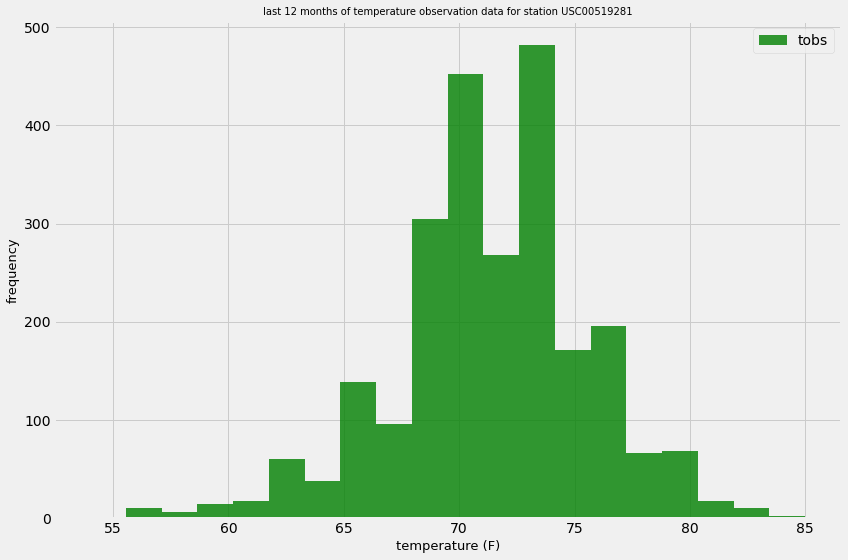

In [56]:
#plot the results as a histogram
Temp12_USC00519281_df_plot = Temp12_USC00519281_df.plot.hist(bins=20, figsize=(12,8), color='g', alpha=0.8)
plt.title('last 12 months of temperature observation data for station USC00519281', size=10)
plt.xlabel('temperature (F)', size=13)
plt.ylabel('frequency', size=13)
plt.tight_layout()


# Close session

In [ ]:
# Close Session
session.close()